In [1]:
import sys
import os
import pandas as pd
import numpy as np 
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

sys.path.append('C:/Users/teeyob/Telco_Investment_Analysis/src')
sys.path.append(os.path.abspath('../scripts'))

In [2]:
from data_preparation import load_data, clean_data

In [3]:
load_data = load_data('xdr_data')
clean_data = clean_data(load_data)
clean_data

Connection successful


c:\Users\teeyob\Telco_Investment_Analysis\scripts\data_preparation.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
569,1.304243e+19,4/24/2019 0:00,61.0,4/25/2019 0:00,60.0,86399.0,2.082019e+14,3.366387e+10,3.538411e+13,T79721B,...,9615204.0,20081994.0,11229850.0,7318005.0,692643690.0,1945199.0,497952472.0,8716305.0,40519534.0,727649104.0
627,7.277826e+18,4/24/2019 0:08,595.0,4/25/2019 0:08,656.0,86400.0,2.082019e+14,3.366399e+10,3.530431e+13,K10473C,...,13069051.0,20144848.0,22830731.0,9878478.0,220125017.0,4685513.0,571439627.0,5701423.0,42167678.0,268316679.0
628,7.277826e+18,4/24/2019 0:08,88.0,4/25/2019 0:08,42.0,86399.0,2.082019e+14,3.362434e+10,3.553231e+13,L36073C,...,20853202.0,3810371.0,10252627.0,12837791.0,666693006.0,9831828.0,179544968.0,9608310.0,40143287.0,699352663.0
644,7.277826e+18,4/24/2019 0:10,527.0,4/25/2019 0:10,535.0,86400.0,2.082015e+14,3.366599e+10,3.567651e+13,T14055B,...,4452675.0,9667405.0,11262152.0,644016.0,688184445.0,12775839.0,505771308.0,5042322.0,31424990.0,713328060.0
653,7.277826e+18,4/24/2019 0:10,506.0,4/25/2019 0:10,505.0,86399.0,2.082014e+14,3.369558e+10,3.554001e+13,L11867A,...,13291634.0,8426277.0,10020430.0,622900.0,633634342.0,7868217.0,602956649.0,590599.0,21110058.0,662729869.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149614,1.304243e+19,4/29/2019 7:24,320.0,4/30/2019 7:24,334.0,86400.0,2.082017e+14,3.366808e+10,8.637690e+13,T88931A,...,3193950.0,8816529.0,17272787.0,1159862.0,618722176.0,11878766.0,592639769.0,6348541.0,29594347.0,653490016.0
149837,7.277826e+18,4/29/2019 7:27,288.0,4/30/2019 7:27,231.0,86399.0,2.082019e+14,3.369858e+10,8.637690e+13,T71378C,...,3694746.0,18014831.0,1490560.0,6179503.0,349067392.0,15784208.0,345817420.0,11980510.0,55073578.0,360035006.0
149877,7.277826e+18,4/29/2019 7:27,289.0,4/30/2019 7:27,294.0,86400.0,2.082018e+14,3.366823e+10,8.637690e+13,T29977B,...,8487254.0,21322927.0,22891392.0,11652869.0,153603076.0,15308351.0,394757743.0,2271791.0,53349908.0,197677871.0
149905,1.304243e+19,4/29/2019 7:27,435.0,4/30/2019 7:27,440.0,86400.0,2.082010e+14,3.361453e+10,3.543151e+13,D11108B,...,18215478.0,20900933.0,7063379.0,20024590.0,131214471.0,3208540.0,539376504.0,10289572.0,57742572.0,163705774.0


In [4]:
from user_overview_analysis import identify_top_handsets, identify_top_manufacturers, identify_top_handsets_per_manufacturer

In [5]:

top_handsets = identify_top_handsets(clean_data)
top_handsets 

,Handset Type,Frequency
0,Huawei B528S-23A,642
1,Huawei E5180,70
2,Samsung Galaxy S8 (Sm-G950F),56
3,Apple iPhone 6 (A1586),45
4,Apple iPhone 6S (A1688),40
5,Apple iPhone 7 (A1778),39
6,undefined,38
7,Apple iPhone Xr (A2105),37
8,Apple iPhone 8 (A1905),35
9,Apple iPhone 8 Plus (A1897),30


In [6]:
top_manufacturers = identify_top_manufacturers(clean_data)
top_manufacturers

,Handset Manufacturer,Frequency
0,Huawei,770
1,Apple,332
2,Samsung,222


In [7]:
top_handsets_per_manufacturer = identify_top_handsets_per_manufacturer(clean_data, top_manufacturers)
top_handsets_per_manufacturer

,Handset Manufacturer,Handset Type,Frequency
0,Apple,Apple iPhone 6 (A1586),45.0
1,Apple,Apple iPhone 6S (A1688),40.0
2,Apple,Apple iPhone 7 (A1778),39.0
3,Apple,Apple iPhone 8 (A1905),35.0
4,Apple,Apple iPhone Xr (A2105),37.0
5,Huawei,Huawei B528S-23A,642.0
6,Huawei,Huawei E5180,70.0
7,Huawei,Huawei P20,10.0
8,Huawei,Huawei P20 Lite Huawei Nova 3E,11.0
9,Huawei,Huawei P20 Pro,9.0


In [8]:
from user_overview_analysis import  aggregate_user_data


In [9]:
user_engagement_data = aggregate_user_data(clean_data)
user_engagement_data

,User MSISDN,Total Sessions,Total Duration (ms),Total Download (Bytes),Total Upload (Bytes),Social Media Download (Bytes),Google Download (Bytes),Email Download (Bytes),YouTube Download (Bytes),Netflix Download (Bytes),Gaming Download (Bytes),Other Download (Bytes)
0,3.360159e+10,1,86399.0,666112027.0,24883465.0,1634584.0,9886011.0,3095312.0,19680399.0,10499285.0,621316436.0,170235914.0
1,3.360194e+10,1,86399.0,777662173.0,39119204.0,81680.0,7340363.0,1175208.0,12165018.0,13563577.0,743336327.0,775480412.0
2,3.360228e+10,1,86400.0,50875434.0,50579636.0,1982803.0,8023890.0,885884.0,12316393.0,18747231.0,8919233.0,249015462.0
3,3.360239e+10,1,86399.0,447229519.0,43230914.0,211691.0,7579596.0,1671723.0,16743604.0,3421631.0,417601274.0,694607520.0
4,3.360251e+10,1,86399.0,256127348.0,42318411.0,753067.0,7749231.0,3231436.0,16625544.0,12005987.0,215762083.0,82264521.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1272,3.375122e+10,1,86399.0,37428747.0,29648494.0,2771731.0,8000379.0,3064320.0,1786363.0,9109968.0,12695986.0,31379494.0
1273,3.375290e+10,1,86399.0,688624211.0,58027288.0,125095.0,1323016.0,389667.0,13694825.0,21546416.0,651545192.0,496678207.0
1274,3.375313e+10,1,86400.0,186716285.0,18511071.0,276168.0,7581806.0,3182877.0,8478857.0,5448388.0,161748189.0,108648548.0
1275,3.375514e+10,1,86399.0,539573994.0,32177711.0,961717.0,1896422.0,1971304.0,10249985.0,2990194.0,521504372.0,680476893.0


In [10]:

df = user_engagement_data
summary_stats = df[['Total Sessions', 'Total Duration (ms)', 'Total Download (Bytes)', 'Total Upload (Bytes)']].describe()
print(summary_stats)


       Total Sessions  Total Duration (ms)  Total Download (Bytes)  \
count     1277.000000          1277.000000            1.277000e+03   
mean         1.082224         93503.312451            4.894360e+08   
std          0.319637         27616.414580            2.787111e+08   
min          1.000000         86399.000000            2.783483e+07   
25%          1.000000         86399.000000            2.703084e+08   
50%          1.000000         86399.000000            4.694729e+08   
75%          1.000000         86400.000000            6.916313e+08   
max          4.000000        345597.000000            2.043328e+09   

       Total Upload (Bytes)  
count          1.277000e+03  
mean           4.393426e+07  
std            1.721075e+07  
min            7.614783e+06  
25%            3.279463e+07  
50%            4.144325e+07  
75%            5.122218e+07  
max            1.717032e+08  


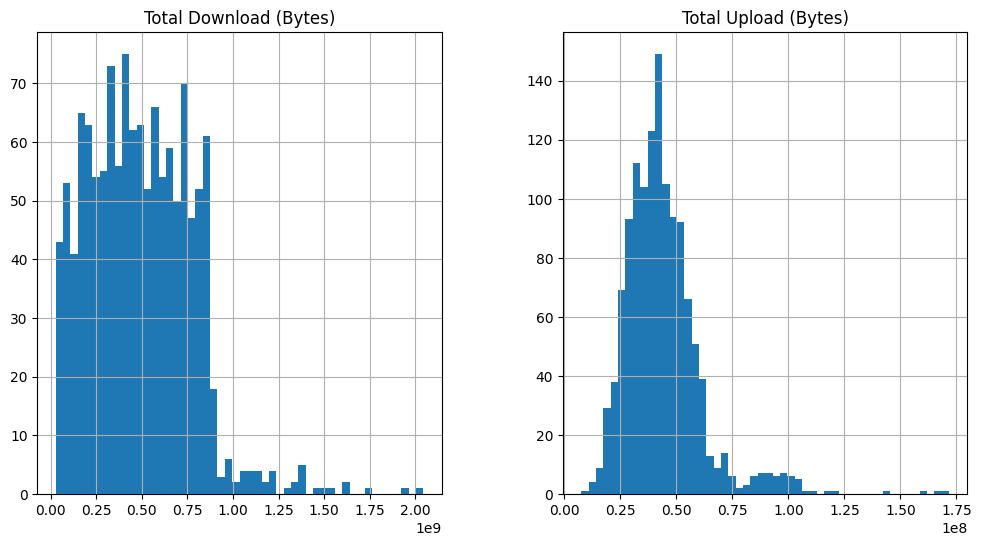

In [11]:


df[['Total Download (Bytes)', 'Total Upload (Bytes)']].hist(bins=50, figsize=(12, 6))
plt.show()


In [12]:
app_data = df[['Social Media Download (Bytes)', 'Google Download (Bytes)', 'YouTube Download (Bytes)', 
               'Netflix Download (Bytes)', 'Gaming Download (Bytes)', 'Other Download (Bytes)']].sum()
app_data_percentage = app_data / app_data.sum() * 100
print(app_data_percentage)


Social Media Download (Bytes)     0.204214
Google Download (Bytes)           0.661740
YouTube Download (Bytes)          1.355071
Netflix Download (Bytes)          1.313492
Gaming Download (Bytes)          47.887885
Other Download (Bytes)           48.577598
dtype: float64


In [13]:
correlation_matrix = df[['Total Download (Bytes)', 'Social Media Download (Bytes)', 'Google Download (Bytes)',
                         'YouTube Download (Bytes)', 'Netflix Download (Bytes)', 'Gaming Download (Bytes)']].corr()
print(correlation_matrix)


                               Total Download (Bytes)  \
Total Download (Bytes)                       1.000000   
Social Media Download (Bytes)                0.245848   
Google Download (Bytes)                      0.237497   
YouTube Download (Bytes)                     0.271114   
Netflix Download (Bytes)                     0.228513   
Gaming Download (Bytes)                      0.998772   

                               Social Media Download (Bytes)  \
Total Download (Bytes)                              0.245848   
Social Media Download (Bytes)                       1.000000   
Google Download (Bytes)                             0.173010   
YouTube Download (Bytes)                            0.182498   
Netflix Download (Bytes)                            0.223411   
Gaming Download (Bytes)                             0.230815   

                               Google Download (Bytes)  \
Total Download (Bytes)                        0.237497   
Social Media Download (Bytes)      

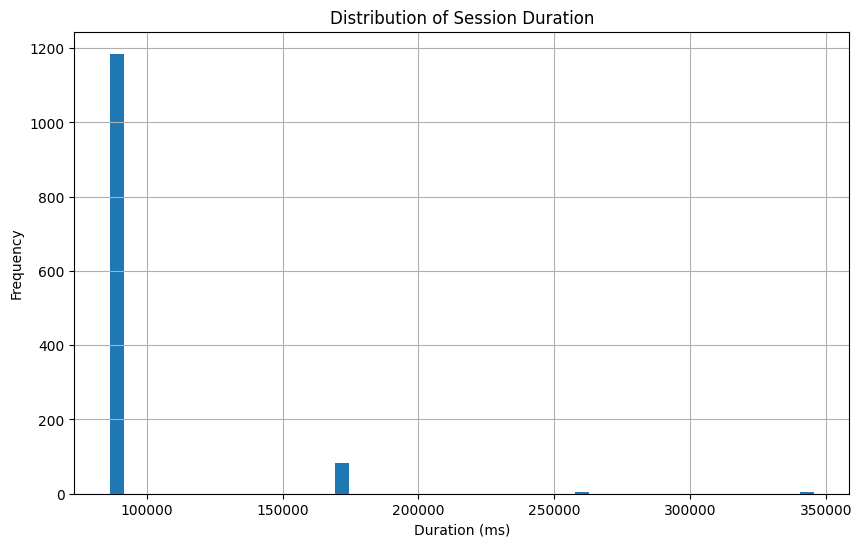

In [14]:
df['Total Duration (ms)'].hist(bins=50, figsize=(10, 6))
plt.title('Distribution of Session Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()


In [15]:


features = df[['Total Download (Bytes)', 'Total Upload (Bytes)', 'Total Duration (ms)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

print(df.groupby('Cluster').mean())


c:\Users\teeyob\Telco_Investment_Analysis\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


          User MSISDN  Total Sessions  Total Duration (ms)  \
Cluster                                                      
0        3.366049e+10        1.000000         86399.236462   
1        3.366517e+10        2.141304        185007.010870   
2        3.366091e+10        1.000000         86399.220285   

         Total Download (Bytes)  Total Upload (Bytes)  \
Cluster                                                 
0                  6.738412e+08          4.034358e+07   
1                  9.282359e+08          8.647650e+07   
2                  2.635562e+08          4.088411e+07   

         Social Media Download (Bytes)  Google Download (Bytes)  \
Cluster                                                           
0                         1.806431e+06             5.964017e+06   
1                         3.879878e+06             1.165201e+07   
2                         1.766532e+06             5.761550e+06   

         Email Download (Bytes)  YouTube Download (Bytes)  \
Cluste

Describe Relevant Variables and Data Types

In [16]:
df = clean_data

print(df.head())
print(df.info())
print(df.describe())


        Bearer Id           Start  Start ms             End  End ms  \
569  1.304243e+19  4/24/2019 0:00      61.0  4/25/2019 0:00    60.0   
627  7.277826e+18  4/24/2019 0:08     595.0  4/25/2019 0:08   656.0   
628  7.277826e+18  4/24/2019 0:08      88.0  4/25/2019 0:08    42.0   
644  7.277826e+18  4/24/2019 0:10     527.0  4/25/2019 0:10   535.0   
653  7.277826e+18  4/24/2019 0:10     506.0  4/25/2019 0:10   505.0   

     Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
569    86399.0  2.082019e+14   3.366387e+10  3.538411e+13            T79721B   
627    86400.0  2.082019e+14   3.366399e+10  3.530431e+13            K10473C   
628    86399.0  2.082019e+14   3.362434e+10  3.553231e+13            L36073C   
644    86400.0  2.082015e+14   3.366599e+10  3.567651e+13            T14055B   
653    86399.0  2.082014e+14   3.369558e+10  3.554001e+13            L11867A   

     ...  Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
569  ...           9

Variable Transformations

In [17]:
from data_analysis_functions import analyze_data
df = user_engagement_data
analyze_data(df)

,decile,total_data,Total Sessions,Total Duration (ms),average_data_per_session
0,0,5.877602e+11,1185,86399.227848,4.960002e+08
1,1,9.335354e+10,197,185007.010870,4.738759e+08


In [18]:
from data_analysis_functions import non_graphical_univariate_analysis
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
non_graphical_univariate_analysis(df, numeric_columns)


,Column,Mean,Median,Std Dev
0,User MSISDN,3.366103e+10,3.366193e+10,2.074570e+07
1,Total Sessions,1.082224e+00,1.000000e+00,3.196374e-01
2,Total Duration (ms),9.350331e+04,8.639900e+04,2.761641e+04
3,Total Download (Bytes),4.894360e+08,4.694729e+08,2.787111e+08
4,Total Upload (Bytes),4.393426e+07,4.144325e+07,1.721075e+07
5,Social Media Download (Bytes),1.936095e+06,1.908232e+06,1.217653e+06
6,Google Download (Bytes),6.273757e+06,6.186453e+06,3.690636e+06
7,Email Download (Bytes),1.915824e+06,1.869503e+06,1.217071e+06
8,YouTube Download (Bytes),1.284701e+07,1.246107e+07,7.996310e+06
9,Netflix Download (Bytes),1.245282e+07,1.195793e+07,7.946478e+06


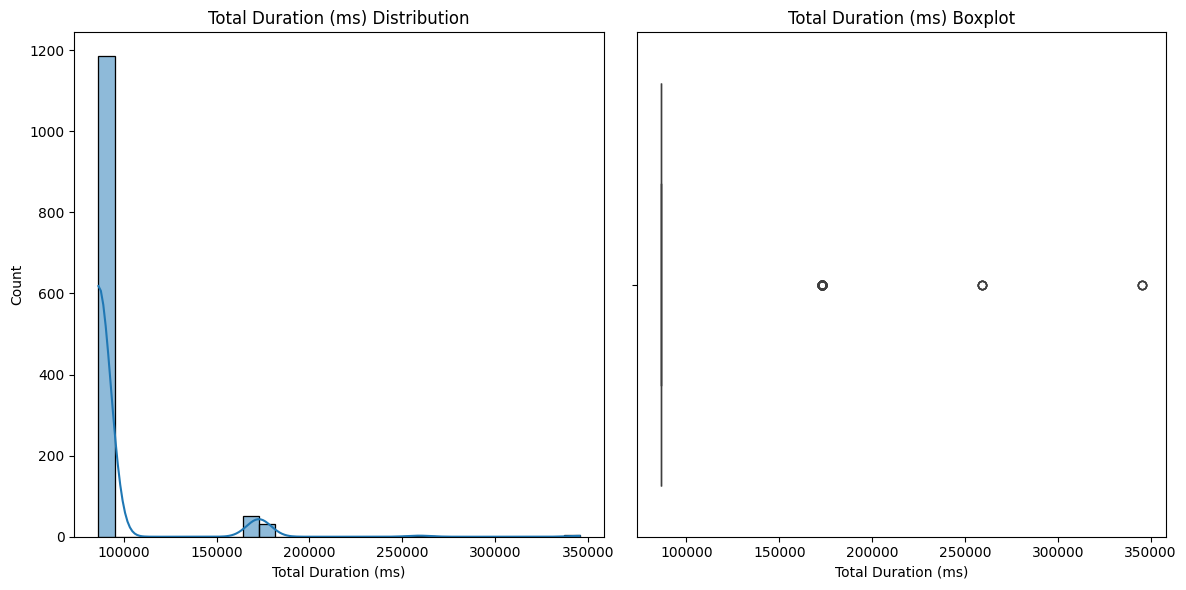

In [19]:
from data_analysis_functions import plot_univariate_analysis
plot_univariate_analysis(df, 'Total Duration (ms)')


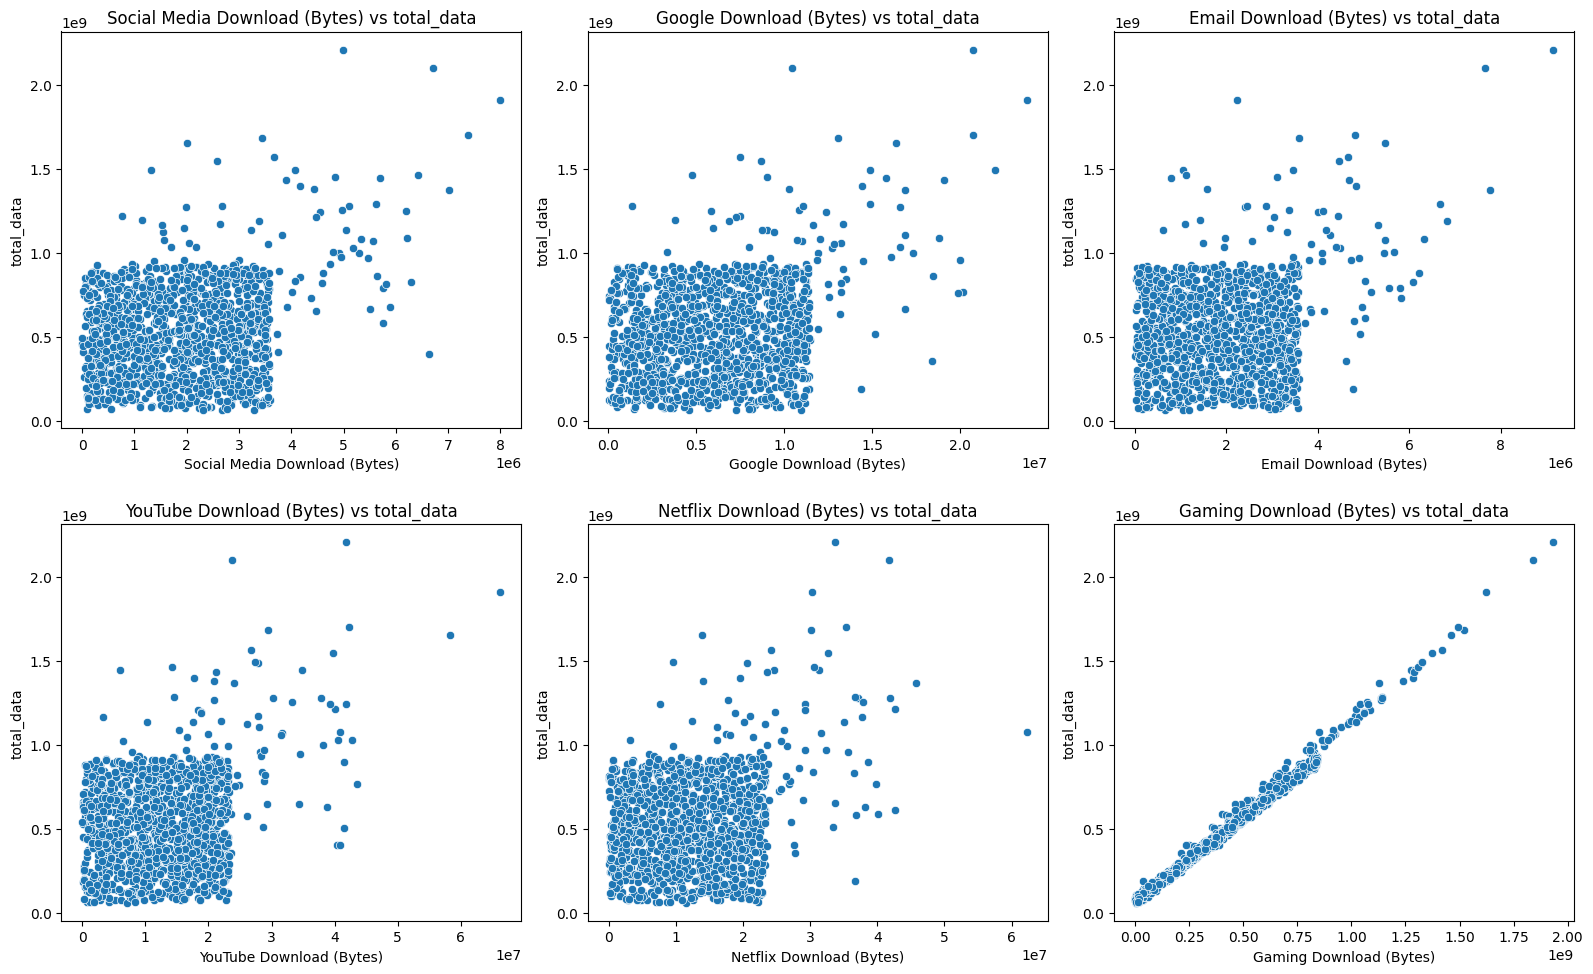

In [20]:
from data_analysis_functions import generate_scatter_plots
app_columns = [
    'Social Media Download (Bytes)', 'Google Download (Bytes)', 'Email Download (Bytes)', 
    'YouTube Download (Bytes)', 'Netflix Download (Bytes)', 'Gaming Download (Bytes)'
]
generate_scatter_plots(df, app_columns, 'total_data')


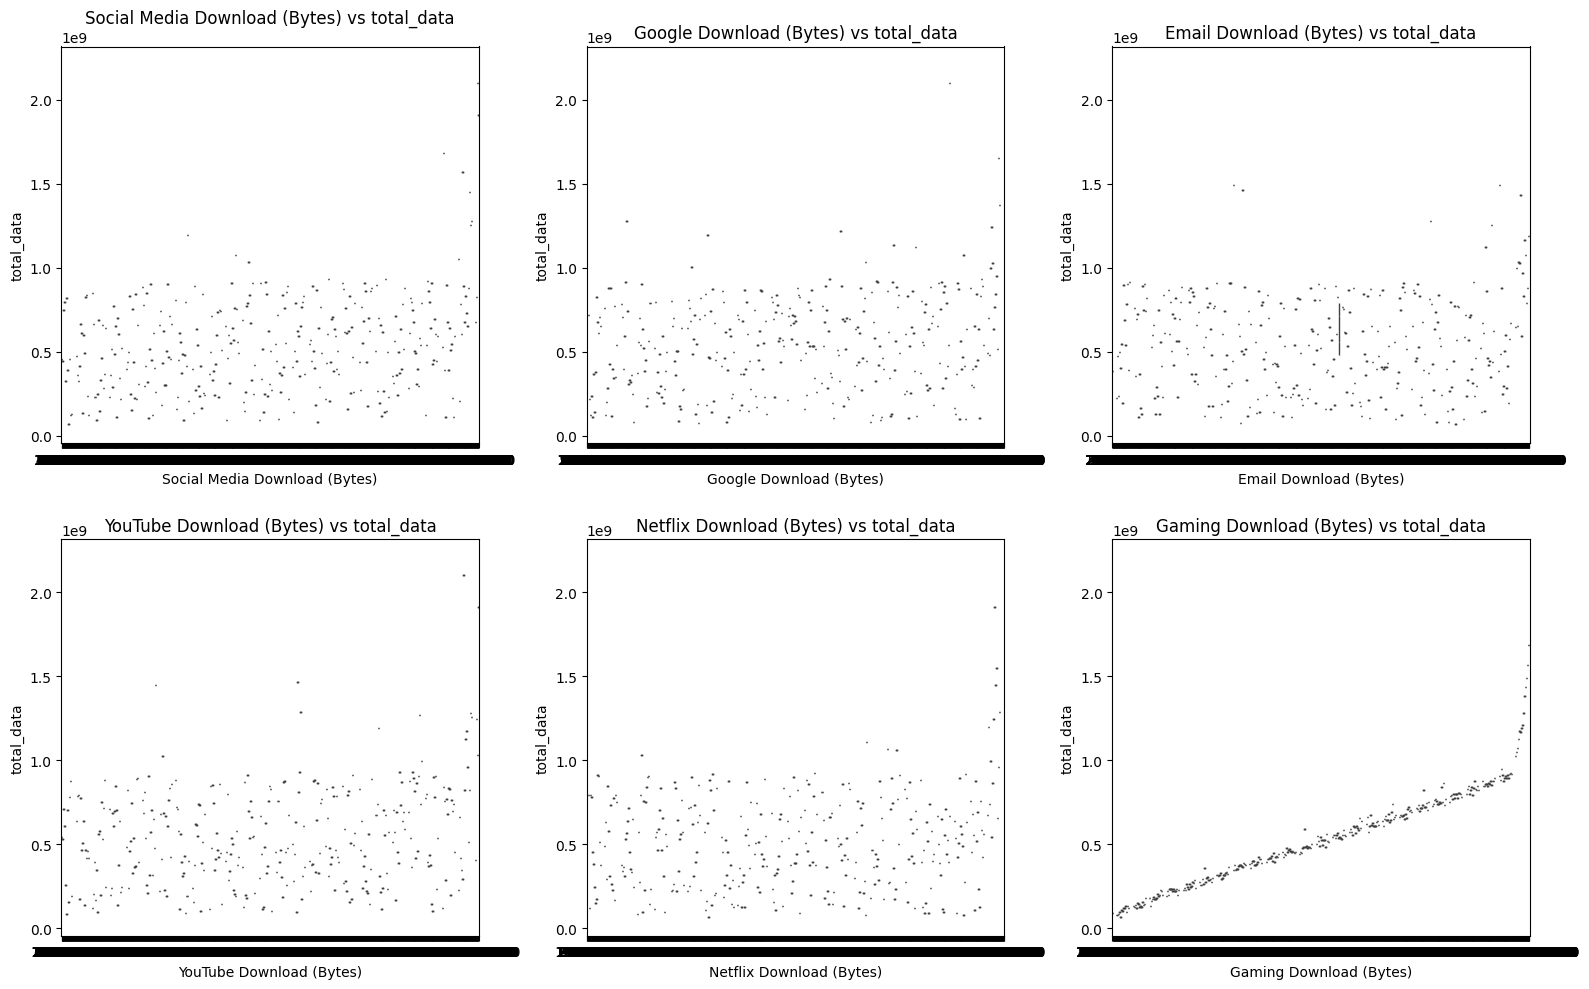

In [21]:
from data_analysis_functions import generate_box_plots
generate_box_plots(df, app_columns, 'total_data')

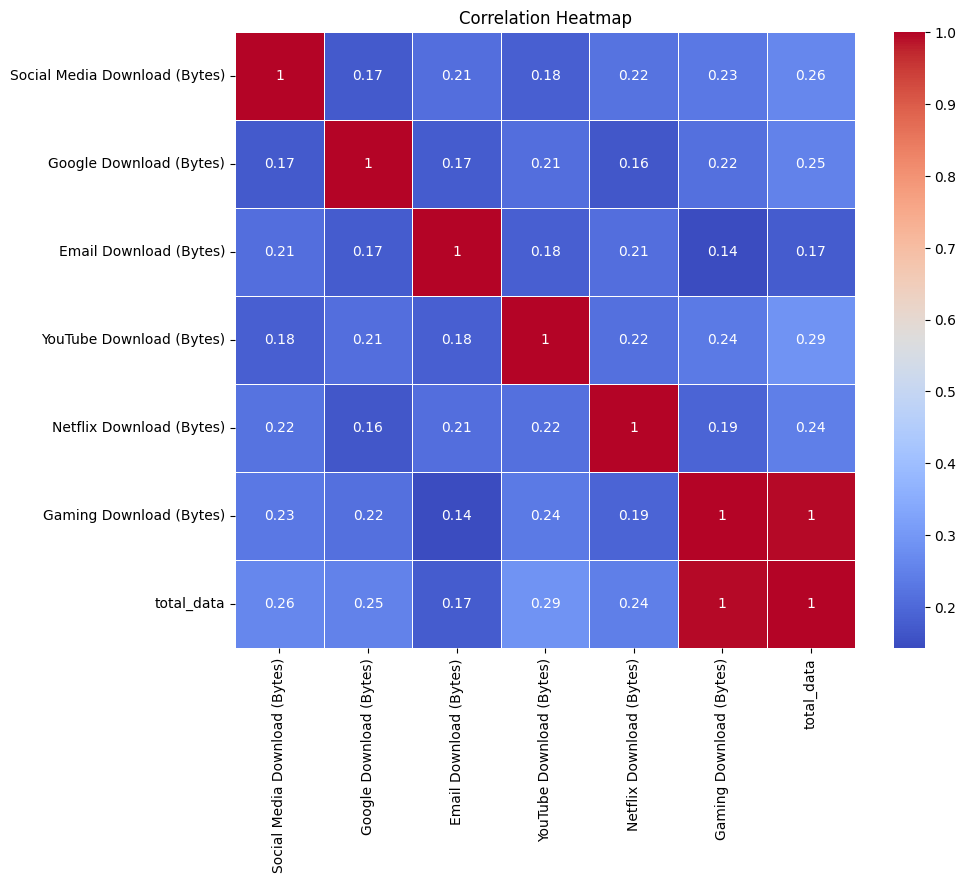

In [22]:
from data_analysis_functions import correlation_heatmap
correlation_heatmap(df, app_columns, 'total_data')

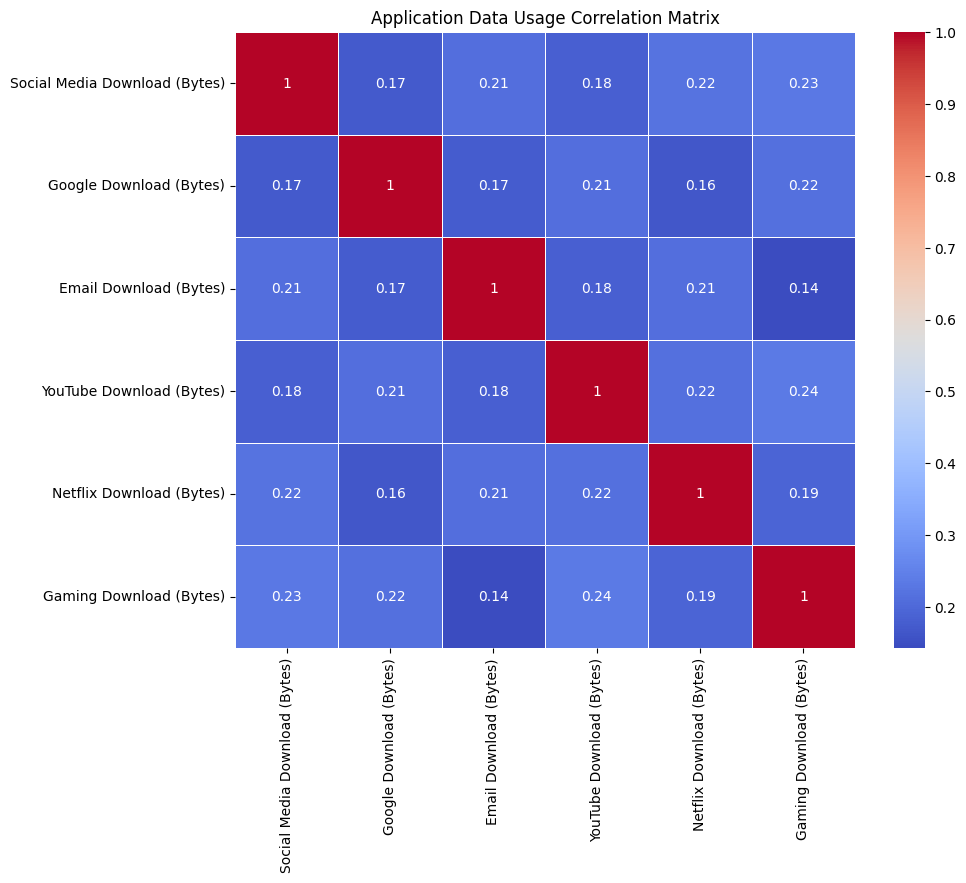

Correlation Matrix:
                               Social Media Download (Bytes)  \
Social Media Download (Bytes)                       1.000000   
Google Download (Bytes)                             0.173010   
Email Download (Bytes)                              0.211404   
YouTube Download (Bytes)                            0.182498   
Netflix Download (Bytes)                            0.223411   
Gaming Download (Bytes)                             0.230815   

                               Google Download (Bytes)  \
Social Media Download (Bytes)                 0.173010   
Google Download (Bytes)                       1.000000   
Email Download (Bytes)                        0.174804   
YouTube Download (Bytes)                      0.210665   
Netflix Download (Bytes)                      0.164721   
Gaming Download (Bytes)                       0.215882   

                               Email Download (Bytes)  \
Social Media Download (Bytes)                0.211404   
Google Dow

In [23]:
from data_analysis_functions import correlation_analysis
correlation_analysis(df, app_columns)

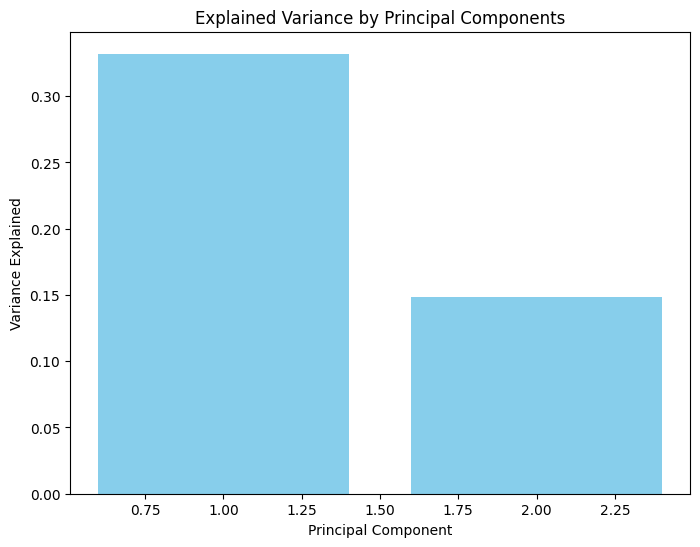

Explained Variance Ratio: [0.33201889 0.14839682]


In [24]:
from data_analysis_functions import perform_pca
features = [
    'Social Media Download (Bytes)', 'Google Download (Bytes)', 'Email Download (Bytes)', 
    'YouTube Download (Bytes)', 'Netflix Download (Bytes)', 'Gaming Download (Bytes)'
]

# Perform PCA and return the principal components
pca_df, explained_variance = perform_pca(df, features, n_components=2)